         Sales
Month         
1960-01   6550
1960-02   8728
1960-03  12026
1960-04  14395
1960-05  14587


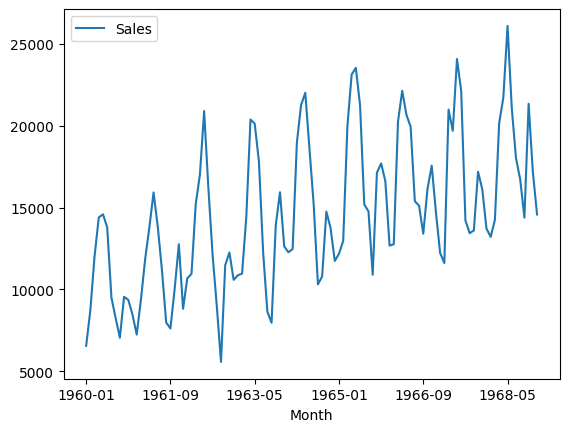

In [6]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('monthly-car-sales.csv', header=0, index_col=0)
#display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

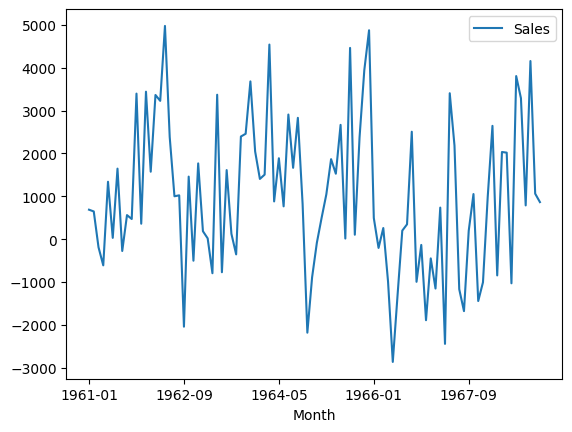

In [7]:
# seasonally adjust the time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('./monthly-car-sales.csv', header=0, index_col=0)
# season difference
differenced = series.diff(12)
# trim off the first year of empty data
differenced = differenced[12:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv', index=False)
# plot differenced dataset
differenced.plot()
pyplot.show()

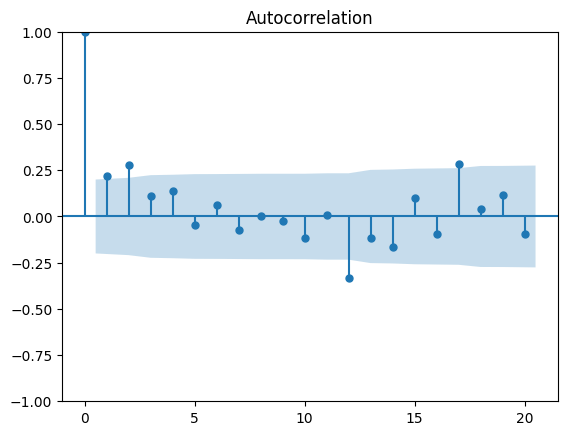

In [8]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
series = read_csv('./seasonally_adjusted.csv', header=0)
plot_acf(series)
pyplot.show()

In [11]:
from pandas import read_csv
from pandas import DataFrame
# load dataset
series = read_csv('./seasonally_adjusted.csv', header=0)
# reframe as supervised learning
dataframe = DataFrame()
for i in range(12, 0, -1):
    dataframe['t-'+str(i)] = series.shift(i).values[:, 0]
dataframe['t'] = series.values[:, 0]
print(dataframe.head(13))
dataframe = dataframe[13:]
# save to new file
dataframe.to_csv('lags_12month_features.csv', index=False)

     t-12   t-11   t-10    t-9     t-8     t-7     t-6     t-5     t-4  \
0     NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   687.0   
5     NaN    NaN    NaN    NaN     NaN     NaN     NaN   687.0   646.0   
6     NaN    NaN    NaN    NaN     NaN     NaN   687.0   646.0  -189.0   
7     NaN    NaN    NaN    NaN     NaN   687.0   646.0  -189.0  -611.0   
8     NaN    NaN    NaN    NaN   687.0   646.0  -189.0  -611.0  1339.0   
9     NaN    NaN    NaN  687.0   646.0  -189.0  -611.0  1339.0    30.0   
10    NaN    NaN  687.0  646.0  -189.0  -611.0  1339.0    30.0  1645.0   
11    NaN  687.0  646.0 -189.0  -611.0  1339.0    30.0  1645.0  -276.0   
12  687.0  646.0 -189.0 -611.0  1339.0

[0.21642244 0.06271259 0.05662302 0.05543768 0.07155573 0.08478599
 0.07699371 0.05366735 0.1033234  0.04897883 0.1066669  0.06283236]


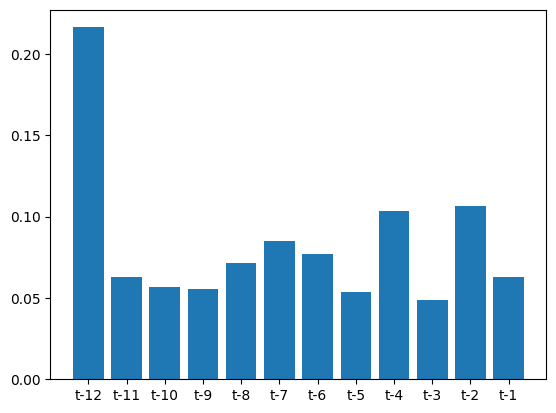

In [20]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# laod data
dataframe = read_csv('lags_12month_features.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

Selected Features:
t-12
t-6
t-4
t-2


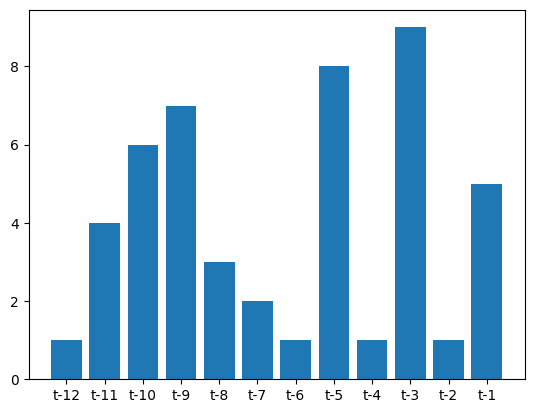

In [25]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load dataset
dataframe = read_csv('lags_12month_features.csv', header=0)
# separate into input and output variables
array = dataframe.values
X = array[:, 0:-1]
y = array[:, -1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()